# <center> Credit Risk Analysis <center>
In this project we will analyse a loan data and try to figure out effects of various features on credit risk
    
**Credit Risk Analysis**  means of accessing the probability that a customer will default on a payment before you extend
a trade gate
## **`probelem Statement : Analyse the data and Predict risk related to any loans`**
we want to make a model for investor or creditor to know the risk of giving loan to a particular creditor
i.e whethere these creditor will default or charge off or not.

    
    
We will do following major step:
    
- Data Understanding
- Data cleaning
- Data exploration
- Preparing Data for Model evaluation
- Fitting a model

    

    
    

# 1.Data understanding
Lets look at our  data and understand the data and various features

In [2]:
#importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("loan_data_2007_2014.csv")

In [4]:
pd.set_option('display.max_columns',None)
print(data.shape)
data.head()

(466285, 75)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 75 columns and 466285 rows in our data
## columns Descriptions:

1.  **unnamed :** Serial number
2. **acc_now_delinq :**	The number of accounts on which the borrower is now delinquent
3. **addr_state :** The state provided by the borrower in the loan application
4. **all_util :**	Balance to credit limit on all trades
5. **annual_inc :**	The self-reported annual income provided by the borrower during registration.
6. **annual_inc_joint :** The combined self-reported annual income provided by the co-borrowers during registration
7. **application_type :**	Indicates whether the loan is an individual application or a joint application with two co-borrowers
8. **collection_recovery_fee :** fee charged by collection agency for collection of deliquent debt
12. **collections_12_mths_ex_med :** Number of collections in 12 months excluding medical collections
13. **delinq_2yrs :**  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
14. **desc :**  self provided description for loan by debtor
15. **dti :** A ratio calculated using the borrowers total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrowers self-reported monthly income.
16. **dti_joint :**	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income
17. **earliest_cr_line :**	The month the borrower's earliest reported credit line was opened
18. **emp_length :** Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
19. **emp_title :**	The job title supplied by the Borrower when applying for the loan.*
20. **funded_amnt :** total amount comitted to loan 
21. **funded_amnt_invc :**  total amount commited by investor for that loan 
22. **grade :**	LC assigned loan grade
23. **home_ownership :** The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
24. **id :** A unique LC assigned ID for the loan listing.
25. **il_util	Ratio :**  Ratio of total current balance to high credit/credit limit on all install acct
26. **initial_list_status :** The initial listing status of the loan. Possible values are  W, F
27. **inq_fi :**   Number of personal finance inquiries
28. **inq_last_12m :** Number of credit inquiries in past 12 months
29. **inq_last_6mths :** The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
30. **installment :** The monthly payment owed by the borrower if the loan originates.
31. **int_rate :** Interest Rate on the loan
32. **issue_d :**  The month which the loan was funded
33. **last_credit_pull_d :** The most recent month LC pulled credit for this loan
36. **last_pymnt_amnt :** Last total payment amount received
37. **last_pymnt_d :** Last month payment was receivedthe borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
39. **loan_status :** Current status of the loan
40. **max_bal_bc :** Maximum current balance owed on all revolving accounts
41. **member_ID :** A unique id assigned to borrower
46. **mths_since_last_delinq :** The number of months since the borrower's last delinquency.
47. **mths_since_last_major_derog	:** Months since most recent 90-day or worse rating
48. **mths_since_last_record :** The number of months since the last public record.
49. **mths_since_rcnt_il :** Months since most recent installment accounts opened

54. **next_pymnt_d  :**	Next scheduled payment date
69. **open_acc :** The number of open credit lines in the borrower's credit file.
70. **open_acc_6m :**	Number of open trades in last 6 months
71. **open_il_12m :**	Number of installment accounts opened in past 12 months
72. **open_il_24m :** Number of installment accounts opened in past 24 months
73. **open_il_6m :** Number of currently active installment trades
74. **open_rv_12m :**	Number of revolving trades opened in past 12 months
75. **open_rv_24m :** Number of revolving trades opened in past 24 months
76. **out_prncp :**	 Remaining outstanding principal for total amount funded 
77. **out_prncp_invc :** Remaining outstanding principal for total amount funded  by investor
77. **policy_code :**  publicy available police=1,  new products not publicaly availbale=2
79. **pub_rec : ** Number of derogatory public records
81. **purpose  : A category provided by the borrower for the loan request.
82. **pymnt_plan :**  indicates if a payment plan has been put in place  for the loan
83. **recoveries :** post charge off gross recovery
82. **revol_bal :**	Total credit revolving balance
83. **revol_util :** Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
84. **sub_grade	:** LC assigned loan subgrade
86. **term	:** The number of payments on the loan. Values are in months and can be either 36 or 60.
87. **title :** The loan title provided by borrower
87. **tot_coll_amt :** Total collection amounts ever owed
88. **tot_cur_bal :** Total current balance of all accounts
90. **total_acc :**	The total number of credit lines currently in the borrower's credit file
92. **total_bal_il :**	Total current balance of all installment accounts
94. **total_cu_tl :** Number of finance trades
96. **total_pymnt :** Payments received to date for total amount funded
97. **total_pymnt_invc :** Payments received to date for total amount funded by investor
97. **total_rec_int	:** Interest received to date
98. **total_rec_late_fee :**	Late fees received to date
99. **total_rec_prncp :** Principal received to date
100. **total_rev_hi_lim :**  Total revolving high credit/credit limit
101. **url :** URL for the LC page with listing data
102. **verification_status :** 
103. **verification_status_joint :** 
104. **zip_code ::** 

In [5]:
df=data.copy()# saving our data in other df so that we can have our original data safe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [7]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

These are statistical description of our Data 

#  2. Data Cleaning
In  this step we will clean our data.
**It Includes various Steps:**
- Dropping unnecessary columns or columns with high null values which are not so significant
- checking Values of each feature
- checking for missing values
- Outliers Treatement

In [8]:
 #our target_variable
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

***As we cant get much information about debtor from current account because we dont know yet whether these accounts
will be defaulted or not so we drop those entries which belongs to currrent account***

- `A default occurs if the lender decides to close your account because you've missed payments.`


In [9]:
df=df[df.loan_status!='Current']
print(df.shape)

(242059, 75)


In [10]:
df.reset_index(inplace=True)

In [11]:
df

,index,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.000,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.110,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.000,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.000,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-04,3.0,NaN,NaN,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.000,Jan-15,161.03,NaN,Sep-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242054,466276,466276,9695736,11547808,8525,8525,8525.0,60 months,18.25,217.65,D,D3,MANAGER,5 years,MORTGAGE,37536.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,medical,Medical expenses,011xx,MA,12.28,4.0,Nov-94,0.0,3.0

## Dropping unecessary columns
- we can drop some irrelevant columns as we want to build a model for investors so we can drop such columns
which aren't available to investor.
columns such as `funded_amnt_invc,funded_amnt,issue_d,out_prncp,out_prncp_invc,total_pymnt,total_pymnt_invc
,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,
next_pymnt_d, collections_12_mths_ex_med`

- we can also drop some unnessary columns which cannot be much helpfull for our model like
`unnammed,id,member_id,desc,url,title,zip_code`
- we can drop columns which have zero variation or very less variations



    

In [12]:
df.drop(['Unnamed: 0','id','member_id','funded_amnt','funded_amnt_inv','issue_d','url','desc','title',
         'zip_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
        'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d',
         'collections_12_mths_ex_med'],axis=1,inplace=True)

In [13]:
df.drop(['next_pymnt_d','index'],axis=1,inplace=True)

In [14]:
df.isnull().sum()#Checking for null values

loan_amnt                           0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       13611
emp_length                       9327
home_ownership                      0
annual_inc                          4
verification_status                 0
loan_status                         0
pymnt_plan                          0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         134963
mths_since_last_record         212660
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        234
total_acc                          29
initial_list

we can drop such columns which have no non-null values or high  null  values.


In [15]:
df.drop(['inq_last_12m','total_cu_tl','inq_fi','all_util','max_bal_bc','open_rv_24m','open_rv_12m','il_util'
        ,'total_bal_il','mths_since_rcnt_il','open_il_24m','open_il_12m','open_il_6m','open_acc_6m',
         'verification_status_joint','dti_joint','annual_inc_joint','mths_since_last_major_derog',
        'mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)

In [16]:
df.nunique()

loan_amnt                1310
term                        2
int_rate                  505
installment             44152
grade                       7
sub_grade                  35
emp_title              131130
emp_length                 11
home_ownership              6
annual_inc              18913
verification_status         3
loan_status                 8
pymnt_plan                  2
purpose                    14
addr_state                 50
dti                      3918
delinq_2yrs                23
earliest_cr_line          634
inq_last_6mths             28
open_acc                   57
pub_rec                    12
revol_bal               46643
revol_util               1205
total_acc                 103
initial_list_status         2
last_pymnt_amnt        181940
last_credit_pull_d        103
policy_code                 1
application_type            1
acc_now_delinq              6
tot_coll_amt             3763
tot_cur_bal            126720
total_rev_hi_lim         9264
dtype: int

*we can see there are few columns with only one unique value so these columns are not usefull in any way
so we will drop them*

In [17]:
df.drop(['application_type','policy_code'],axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242059 entries, 0 to 242058
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            242059 non-null  int64  
 1   term                 242059 non-null  object 
 2   int_rate             242059 non-null  float64
 3   installment          242059 non-null  float64
 4   grade                242059 non-null  object 
 5   sub_grade            242059 non-null  object 
 6   emp_title            228448 non-null  object 
 7   emp_length           232732 non-null  object 
 8   home_ownership       242059 non-null  object 
 9   annual_inc           242055 non-null  float64
 10  verification_status  242059 non-null  object 
 11  loan_status          242059 non-null  object 
 12  pymnt_plan           242059 non-null  object 
 13  purpose              242059 non-null  object 
 14  addr_state           242059 non-null  object 
 15  dti              

###  `Lets look at various features now and check is there any noisy data or messy data`

1. ***term***

In [19]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [20]:
#making term as integer
df['term']=pd.to_numeric(df.term.str.replace("months",""))
df.term.unique()


array([36, 60], dtype=int64)

2. ***earliest_cr_line***

In [21]:

df['earliest_cr_line'].unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Nov-04', 'Jan-07',
       'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89', 'Jul-03', 'May-91',
       'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03', 'Jan-01', 'Nov-97',
       'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01', 'Feb-02', 'Aug-84',
       'Nov-06', 'Dec-87', 'Nov-81', 'Apr-05', 'Oct-07', 'Jul-05',
       'Dec-00', 'Apr-07', 'Jan-03', 'Mar-94', 'Sep-98', 'Jun-04',
       'Nov-95', 'Jul-99', 'Jun-95', 'Sep-92', 'Jan-02', 'Apr-92',
       'Oct-06', 'May-00', 'Dec-98', 'Dec-04', 'Oct-00', 'May-02',
       'Jul-02', 'Jul-06', 'May-97', 'Oct-05', 'Apr-95', 'Oct-02',
       'Jan-00', 'Apr-00', 'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99',
       'Nov-03', 'Jun-89', 'Jun-03', 'Oct-96', 'May-03', 'Jun-02',
       'Jun-07', 'Dec-96', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97',
       'Jun-05', 'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92',
       'May-06', 'Mar-97', 'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00',
       'Feb-01', 'Dec-88', 'Feb-99', 'Dec-91', 'Aug-00', 'Oct-

In [22]:
#getting earliest_cr_line as int such that it represents number of months passed
df['earliest_cr_line_date']=pd.to_datetime(df['earliest_cr_line'],format='%b-%y')
df['earliest_cr_line_date']

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        2004-11-01
            ...    
242054   1994-11-01
242055   1998-07-01
242056   2002-06-01
242057   1997-06-01
242058   2003-02-01
Name: earliest_cr_line_date, Length: 242059, dtype: datetime64[ns]

In [23]:
import datetime as dt
df['months_since_earliest_cr_line']=(pd.to_datetime("2023-06-23")-df['earliest_cr_line_date'])/np.timedelta64(1,'M')

In [24]:
df['months_since_earliest_cr_line'].describe()

count    242030.000000
mean        303.376516
std          89.828276
min        -545.325366
25%         249.697119
50%         289.747223
75%         345.699090
max         653.680774
Name: months_since_earliest_cr_line, dtype: float64

In [25]:
#some values are negative which is not possible values of months
df[df.months_since_earliest_cr_line<0][['earliest_cr_line','earliest_cr_line_date','months_since_earliest_cr_line']]

,earliest_cr_line,earliest_cr_line_date,months_since_earliest_cr_line
1423,Sep-62,2062-09-01,-470.317666
1595,Sep-68,2068-09-01,-542.335572
2521,Sep-64,2064-09-01,-494.334586
2948,Sep-67,2067-09-01,-530.310684
3017,Feb-65,2065-02-01,-499.361383
...,...,...,...
239910,Jan-62,2062-01-01,-462.333929
239951,Jun-65,2065-06-01,-503.303969
241166,Jul-66,2066-07-01,-516.281648
241736,Sep-67,2067-09-01,-530.310684


In [26]:
#we can observe that years are misinterpreted in date of earliest_cr_line
s=dt.timedelta(365*100)
for i in range(len(df)):
    if df['months_since_earliest_cr_line'][i]<0:
        df['earliest_cr_line_date'][i]= df['earliest_cr_line_date'][i]-s
        df['months_since_earliest_cr_line'][i]=(pd.to_datetime('2023-06-23')-df['earliest_cr_line_date'][i])/np.timedelta64(1,'M')

In [27]:
df['months_since_earliest_cr_line'].describe()

count    242030.000000
mean        305.952997
std          83.566582
min         139.698967
25%         249.697119
50%         289.747223
75%         346.717592
max         928.873283
Name: months_since_earliest_cr_line, dtype: float64

Now our earliesr_cr_line feature has converted to numerical feature without loosing any information

3. ***initial_list_status***

In [28]:
df['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [29]:
df['initial_list_status'].value_counts()

f    179561
w     62498
Name: initial_list_status, dtype: int64

This columns looks fine

4. ***emp_length***

In [30]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years',
       nan], dtype=object)

emp_length feature contains some charactors so we will remove these and change to intger

In [31]:
#As we can see there are some charactors in emp_lenght so we can replace then and convert this to integer
df['emp_length_int']=df.emp_length.str.replace('\+ years','')
df['emp_length_int']=df.emp_length_int.str.replace('years','')
df['emp_length_int']=df.emp_length_int.str.replace('year','')
df['emp_length_int']=df.emp_length_int.str.replace('n/a','0')
df['emp_length_int']=df.emp_length_int.str.replace('<','')

In [32]:
df['emp_length_int']=pd.to_numeric(df['emp_length_int'])

In [33]:
df.emp_length_int.unique()

array([10.,  1.,  3.,  9.,  4.,  5.,  6.,  2.,  7.,  8., nan])

5. ***last_credit_pull_d***

In [34]:
print(df['last_credit_pull_d'].isnull().sum())
df['last_credit_pull_d']

23


0         Jan-16
1         Sep-13
2         Jan-16
3         Jan-15
4         Sep-15
           ...  
242054    Oct-14
242055    Oct-14
242056    Jan-16
242057    Jan-16
242058    Apr-15
Name: last_credit_pull_d, Length: 242059, dtype: object

In [35]:
#for making this feature numerical we will do the same thing that we have done with out earliest_cr_line feature
df['last_credit_pull_date']=pd.to_datetime(df['last_credit_pull_d'],format="%b-%y")

In [36]:
df['months_since_last_credit_pull']=(pd.to_datetime('23-06-23')-df['last_credit_pull_date'])/np.timedelta64(1,"M")
print(df['months_since_last_credit_pull'].describe())

count    242036.000000
mean         97.456908
std          12.243218
min          89.693834
25%          89.693834
50%          91.697981
75%         100.667365
max         193.745251
Name: months_since_last_credit_pull, dtype: float64


6. ***grade***

In [37]:
df.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [38]:
df.grade.value_counts()

B    72920
C    61942
A    39676
D    39428
E    18528
F     7532
G     2033
Name: grade, dtype: int64

grade column looks fine

6. ***sub_grade***

In [39]:
df.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

7. ***emp_title***

In [40]:
df.emp_title.unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'MecÃ¡nica',
       'Chief of Interpretation (Park Ranger)', 'Server Engineer Lead'],
      dtype=object)

In [41]:
df.emp_title.nunique()

131130

we can drop this columns as it contain 205475 unique categorical values

In [42]:
df.drop('emp_title',axis=1,inplace=True)

8.  ***home_ownership***

In [43]:
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [44]:
df['home_ownership']=df.home_ownership.str.replace('ANY','OTHER')

In [45]:
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

9. ***verification_status***

In [46]:
df.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [47]:
df.verification_status.value_counts()

Verified           90030
Not Verified       83792
Source Verified    68237
Name: verification_status, dtype: int64

10. ***pymnt_plan***

In [48]:
df.pymnt_plan.unique()


array(['n', 'y'], dtype=object)

In [49]:
df.pymnt_plan.value_counts()

n    242052
y         7
Name: pymnt_plan, dtype: int64

so pymnt plan columns has very negligible variance and not so signicant for our model
so we can drop this too

In [50]:
df.drop('pymnt_plan',axis=1,inplace=True)

In [51]:
#lets chck our dataframe now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242059 entries, 0 to 242058
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   loan_amnt                      242059 non-null  int64         
 1   term                           242059 non-null  int64         
 2   int_rate                       242059 non-null  float64       
 3   installment                    242059 non-null  float64       
 4   grade                          242059 non-null  object        
 5   sub_grade                      242059 non-null  object        
 6   emp_length                     232732 non-null  object        
 7   home_ownership                 242059 non-null  object        
 8   annual_inc                     242055 non-null  float64       
 9   verification_status            242059 non-null  object        
 10  loan_status                    242059 non-null  object        
 11  

we have got some features as new features so lets drop previous ones

In [52]:
df.drop(['emp_length','earliest_cr_line','earliest_cr_line_date','last_credit_pull_date','last_credit_pull_d'],axis=1,inplace=True)


In [53]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_pymnt_amnt,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,months_since_earliest_cr_line,emp_length_int,months_since_last_credit_pull
0,5000,36,10.65,162.87,B,B2,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,171.62,0.0,NaN,NaN,NaN,461.676831,10.0,89.693834
1,2500,60,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,f,119.66,0.0,NaN,NaN,NaN,290.732869,1.0,117.686195
2,2400,36,15.96,84.33,C,C5,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,649.91,0.0,NaN,NaN,NaN,259.685004,10.0,89.693834
3,10000,36,13.49,339.31,C,C1,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,f,357.48,0.0,NaN,NaN,NaN,328.680260,10.0,101.685866
4,5000,36,7.90,156.46,A,A4,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0.0,3.0,9.0,0.0,7963,28.3,12.0,f,161.03,0.0,NaN,NaN,NaN,223.676051,3.0,93.702129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242054,8525,60,18.25,217.65,D,D3,MORTGAGE,37536.0,Verified,Charged Off,medical,MA,12.28,4.0,0.0,12.0,0.0,5318,10.7,26.0,f,217.65,0.0,0.0,116995.0,49800.0,343.694942,5.0,104.708516
242055,18000,36,7.90,563.23,A,A4,RENT,90000.0,Verified,Charged Off,debt_consolidation,MD,10.33,1.0,0.0,16.0,0.0,8224,16.3,33.0,f,563.23,0.0,0.0,42592.0,50300.0,299.735107,3.0,104.708516
242056,10000,36,18.25,362.78,D,D3,RENT,42000.0,Source Verified,Fully Paid,vacation,VA,11.57,0.0,0.0,9.0,0.0,3196,28.8,24.0,f,5501.60,0.0,0.0,10170.0,11100.0,252.719768,10.0,89.693834
242057,22000,60,19.97,582.50,D,D5,MORTGAGE,78000.0,Verified,Charged Off,debt_consolidation,TN,18.45,0.0,5.0,18.0,1.0,18238,46.3,30.0,f,17.50,0.0,0.0,221830.0,39400.0,312.712787,10.0,89.693834


## Missing Values
We will check for missing values in different columns and try to  impute it 

In [54]:
df.isnull().sum()

loan_amnt                            0
term                                 0
int_rate                             0
installment                          0
grade                                0
sub_grade                            0
home_ownership                       0
annual_inc                           4
verification_status                  0
loan_status                          0
purpose                              0
addr_state                           0
dti                                  0
delinq_2yrs                         29
inq_last_6mths                      29
open_acc                            29
pub_rec                             29
revol_bal                            0
revol_util                         234
total_acc                           29
initial_list_status                  0
last_pymnt_amnt                      0
acc_now_delinq                      29
tot_coll_amt                     66689
tot_cur_bal                      66689
total_rev_hi_lim         

There are few columns for which missing data is very less so we can simply drop some row
as dropping very few row wont lead to data loss

In [55]:
df.dropna(subset=['months_since_last_credit_pull','months_since_earliest_cr_line','acc_now_delinq',
                 'total_acc','pub_rec','open_acc','inq_last_6mths',
                  'delinq_2yrs','annual_inc'],inplace=True)

In [56]:
print(df.shape)

(242008, 29)


In [57]:

df.isnull().sum()

loan_amnt                            0
term                                 0
int_rate                             0
installment                          0
grade                                0
sub_grade                            0
home_ownership                       0
annual_inc                           0
verification_status                  0
loan_status                          0
purpose                              0
addr_state                           0
dti                                  0
delinq_2yrs                          0
inq_last_6mths                       0
open_acc                             0
pub_rec                              0
revol_bal                            0
revol_util                         205
total_acc                            0
initial_list_status                  0
last_pymnt_amnt                      0
acc_now_delinq                       0
tot_coll_amt                     66657
tot_cur_bal                      66657
total_rev_hi_lim         

In [58]:
#we can fill revoll_util missing values by mean because it would be unfair if we fill any less number or greate number
df.revol_util.fillna(df.revol_util.mean(),inplace=True)

In [59]:
df.revol_util.isnull().sum()

0

In [60]:
df['tot_coll_amt'].describe()

count    1.753510e+05
mean     2.013036e+02
std      2.191862e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.152545e+06
Name: tot_coll_amt, dtype: float64

we should impute this using median as data is very skewed

In [61]:
df.tot_coll_amt.fillna(df.tot_coll_amt.median(),inplace=True)
        

In [62]:
df.emp_length_int.fillna(df.emp_length_int.median(),inplace=True)

In [63]:
df.tot_cur_bal.describe()

count    1.753510e+05
mean     1.364522e+05
std      1.502823e+05
min      0.000000e+00
25%      2.796150e+04
50%      7.898200e+04
75%      2.061440e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64

In [64]:
df.tot_cur_bal.fillna(df.tot_cur_bal.mean(),inplace=True)

In [65]:
df.total_rev_hi_lim.describe()

count    1.753510e+05
mean     2.904582e+04
std      2.847435e+04
min      0.000000e+00
25%      1.320000e+04
50%      2.200000e+04
75%      3.610000e+04
max      2.013133e+06
Name: total_rev_hi_lim, dtype: float64

In [66]:
df.total_rev_hi_lim.fillna(df.total_rev_hi_lim.mean(),inplace=True)

In [67]:
df.isnull().sum()

loan_amnt                        0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
home_ownership                   0
annual_inc                       0
verification_status              0
loan_status                      0
purpose                          0
addr_state                       0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                       0
total_acc                        0
initial_list_status              0
last_pymnt_amnt                  0
acc_now_delinq                   0
tot_coll_amt                     0
tot_cur_bal                      0
total_rev_hi_lim                 0
months_since_earliest_cr_line    0
emp_length_int                   0
months_since_last_cr

   *our data have zero missing values now*

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242008 entries, 0 to 242058
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_amnt                      242008 non-null  int64  
 1   term                           242008 non-null  int64  
 2   int_rate                       242008 non-null  float64
 3   installment                    242008 non-null  float64
 4   grade                          242008 non-null  object 
 5   sub_grade                      242008 non-null  object 
 6   home_ownership                 242008 non-null  object 
 7   annual_inc                     242008 non-null  float64
 8   verification_status            242008 non-null  object 
 9   loan_status                    242008 non-null  object 
 10  purpose                        242008 non-null  object 
 11  addr_state                     242008 non-null  object 
 12  dti                           

In [69]:
df['loan_status'].value_counts(normalize=True)

Fully Paid                                             0.763297
Charged Off                                            0.175486
Late (31-120 days)                                     0.028511
In Grace Period                                        0.013000
Does not meet the credit policy. Status:Fully Paid     0.008103
Late (16-30 days)                                      0.005033
Default                                                0.003438
Does not meet the credit policy. Status:Charged Off    0.003132
Name: loan_status, dtype: float64

In [70]:
df['good_bad']=np.where(df['loan_status'].isin(['Current','Fully Paid','In Grace Period','Does not meet the credit policy. Status:Fully Paid','Late(16-30 days)']),1,0)
df.drop('loan_status',axis=1,inplace=True)

In [71]:
#1 means good credit and 0 means bad credit
df['good_bad'].value_counts()

1    189831
0     52177
Name: good_bad, dtype: int64

# Performing EDA


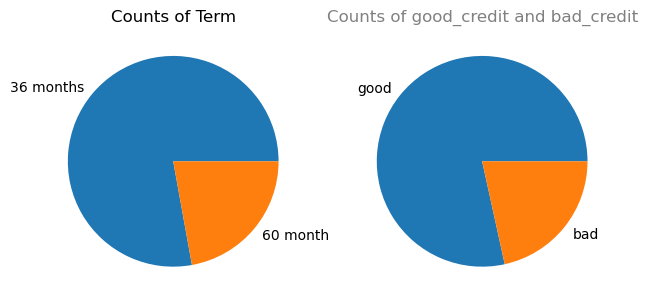

In [72]:
fig,axes=plt.subplots(1,2)
axes[0].pie(df['term'].value_counts(),labels=['36 months','60 month'])
axes[0].set_title("Counts of Term")
axes[1].pie(df['good_bad'].value_counts(),labels=['good','bad'])
axes[1].set_title('Counts of good_credit and bad_credit',color='grey')
plt.tight_layout()

In [73]:
df_categorical=df.select_dtypes('object')
df_categorical

,grade,sub_grade,home_ownership,verification_status,purpose,addr_state,initial_list_status
0,B,B2,RENT,Verified,credit_card,AZ,f
1,C,C4,RENT,Source Verified,car,GA,f
2,C,C5,RENT,Not Verified,small_business,IL,f
3,C,C1,RENT,Source Verified,other,CA,f
4,A,A4,RENT,Source Verified,wedding,AZ,f
...,...,...,...,...,...,...,...
242054,D,D3,MORTGAGE,Verified,medical,MA,f
242055,A,A4,RENT,Verified,debt_consolidation,MD,f
242056,D,D3,RENT,Source Verified,vacation,VA,f
242057,D,D5,MORTGAGE,Verified,debt_consolidation,TN,f


 ***we will see number of itmes in categories in all feature by plotting a countplot***

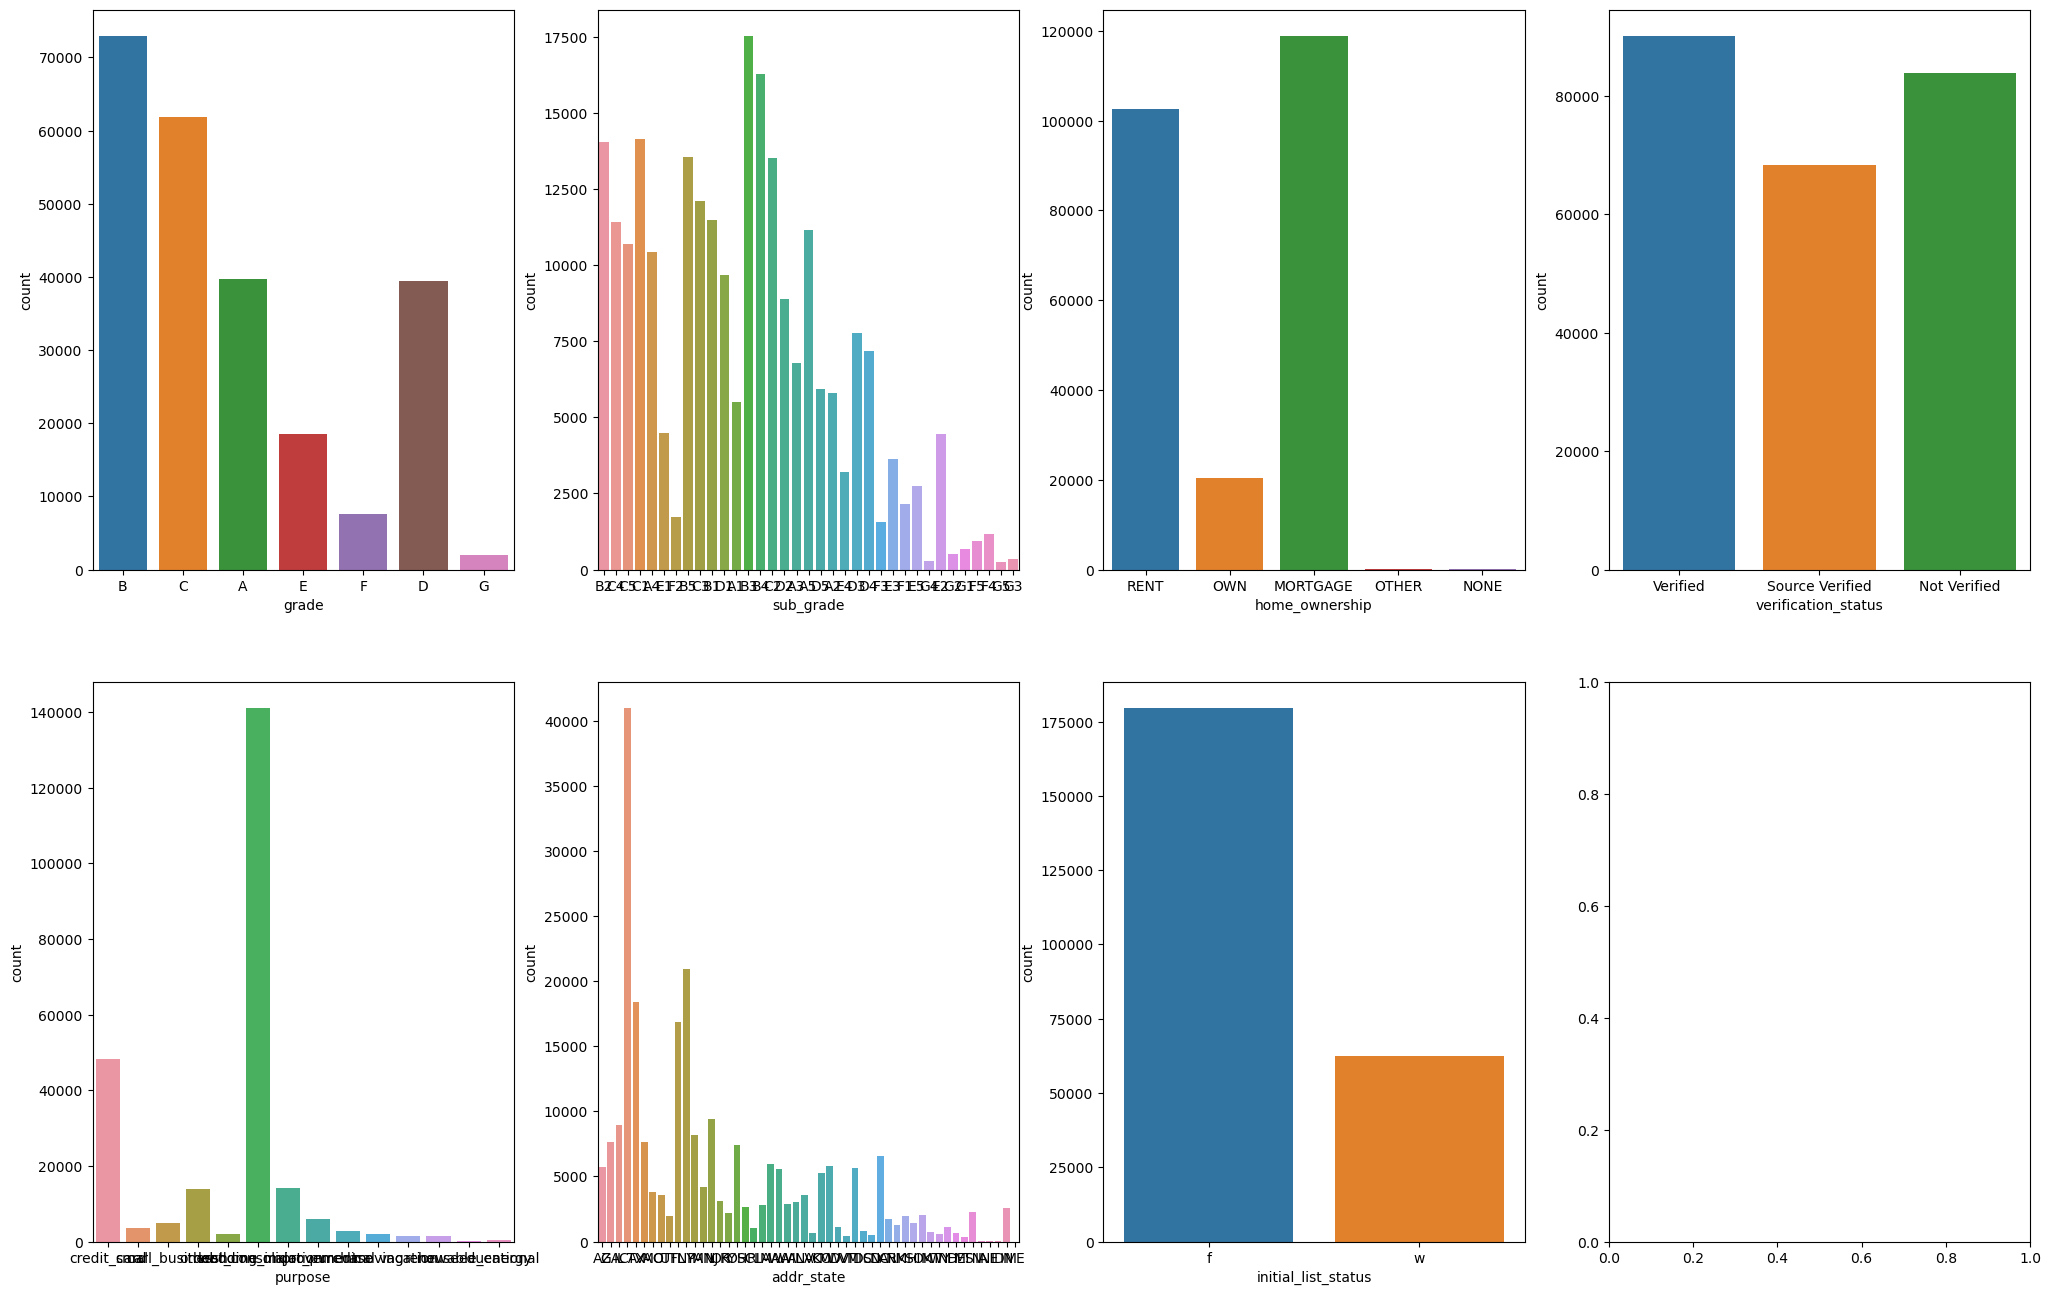

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

In [74]:
#counts of categorical columns
fig,axes=plt.subplots(2,4,figsize=(25,16))
axes=axes.ravel()
for i,ax in zip(df_categorical.columns,axes):
    plt.figure(figsize=(8,4))
    sns.countplot(df[i],ax=ax)
    plt.tight_layout()

In [75]:
numerical=df.select_dtypes(include=['float','int'])
numerical.drop(['term','good_bad'],axis=1,inplace=True)
numerical

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,months_since_earliest_cr_line,emp_length_int,months_since_last_credit_pull
0,5000,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,171.62,0.0,0.0,136452.236406,29045.8232,461.676831,10.0,89.693834
1,2500,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,119.66,0.0,0.0,136452.236406,29045.8232,290.732869,1.0,117.686195
2,2400,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,649.91,0.0,0.0,136452.236406,29045.8232,259.685004,10.0,89.693834
3,10000,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,357.48,0.0,0.0,136452.236406,29045.8232,328.680260,10.0,101.685866
4,5000,7.90,156.46,36000.0,11.20,0.0,3.0,9.0,0.0,7963,28.3,12.0,161.03,0.0,0.0,136452.236406,29045.8232,223.676051,3.0,93.702129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242054,8525,18.25,217.65,37536.0,12.28,4.0,0.0,12.0,0.0,5318,10.7,26.0,217.65,0.0,0.0,116995.000000,49800.0000,343.694942,5.0,104.708516
242055,18000,7.90,563.23,90000.0,10.33,1.0,0.0,16.0,0.0,8224,16.3,33.0,563.23,0.0,0.0,42592.000000,50300.0000,299.735107,3.0,104.708516
242056,10000,18.25,362.78,42000.0,11.57,0.0,0.0,9.0,0.0,3196,28.8,24.0,5501.60,0.0,0.0,10170.000000,11100.0000,252.719768,10.0,89.693834
242057,22000,19.97,582.50,78000.0,18.45,0.0,5.0,18.0,1.0,18238,46.3,30.0,17.50,0.0,0.0,221830.000000,39400.0000,312.712787,10.0,89.693834


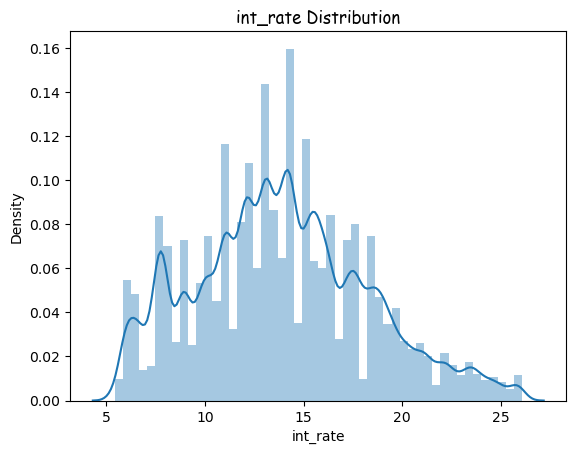

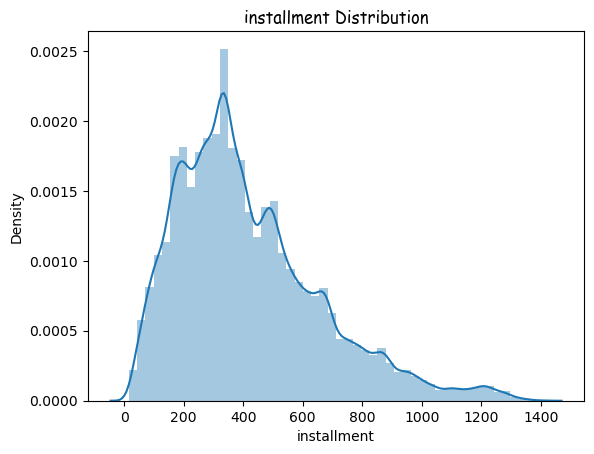

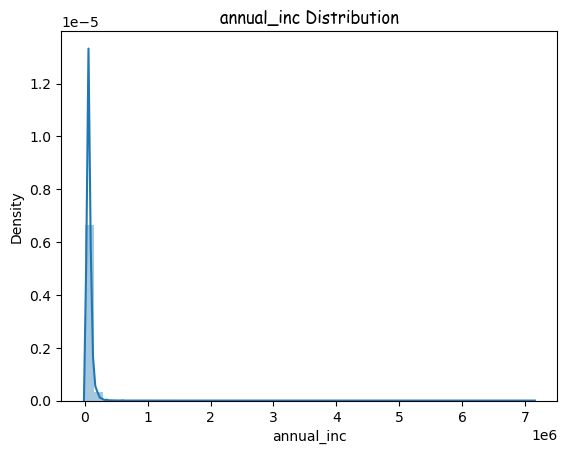

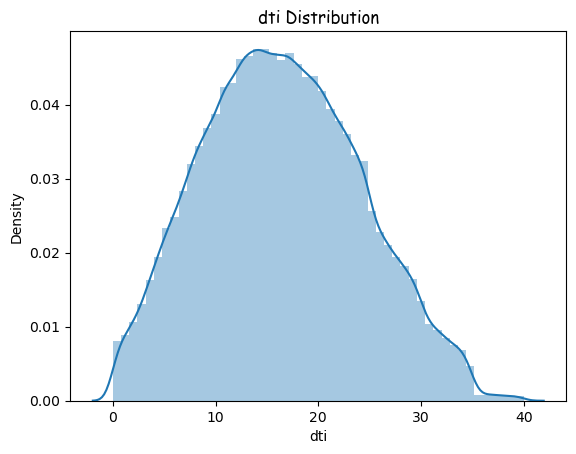

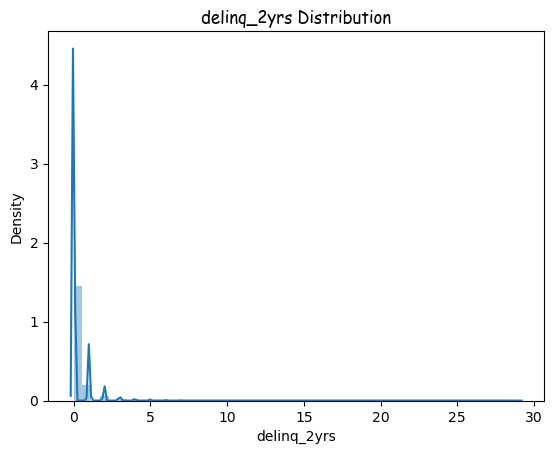

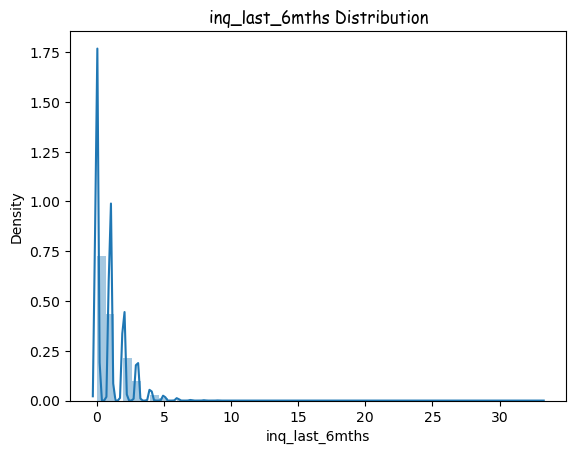

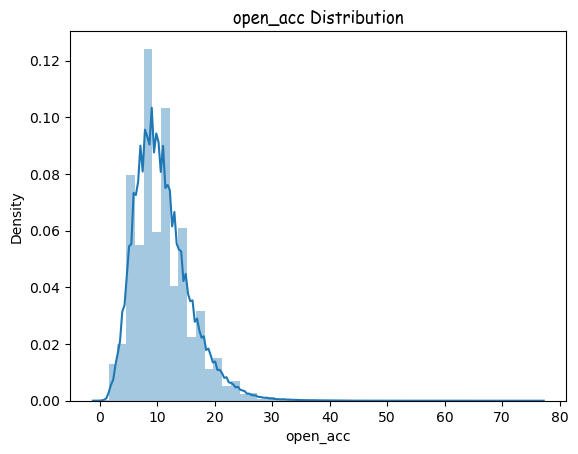

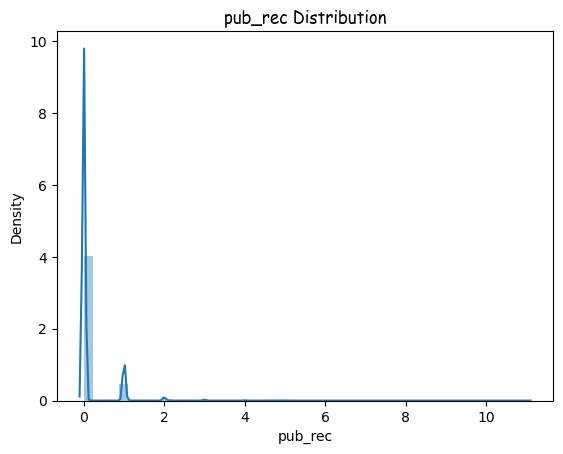

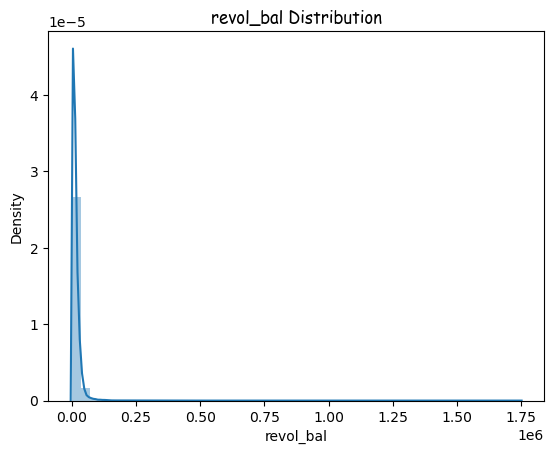

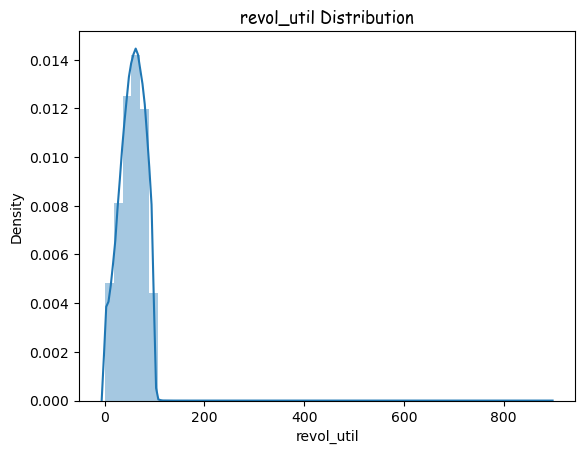

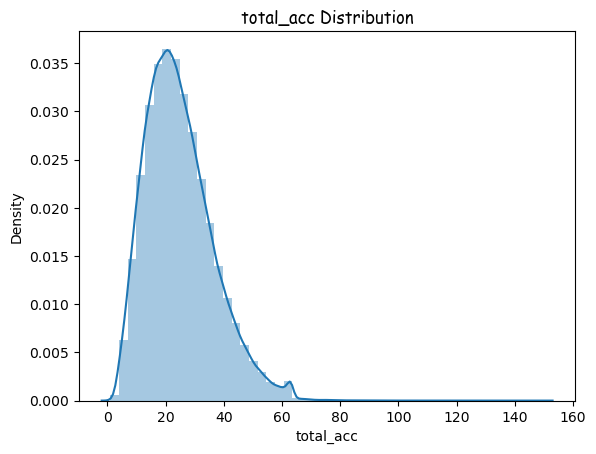

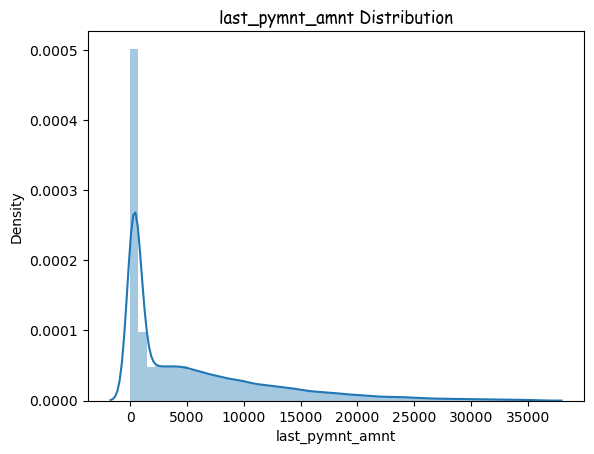

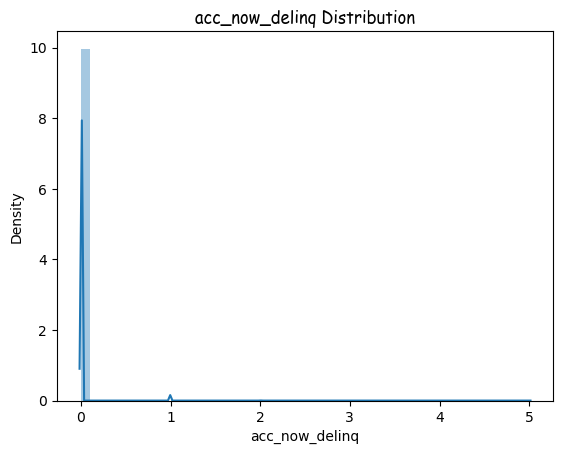

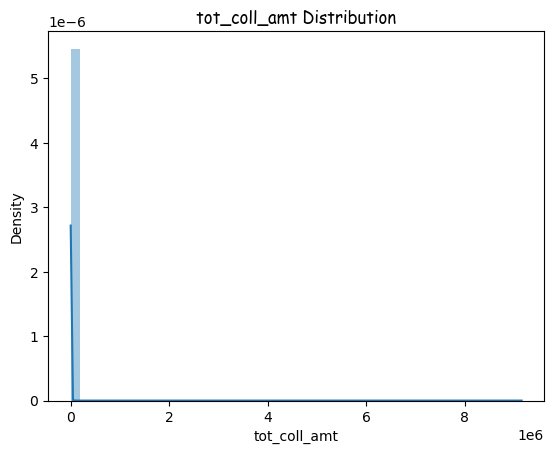

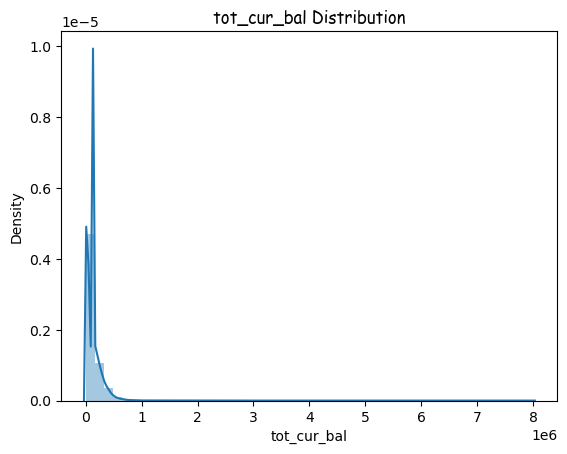

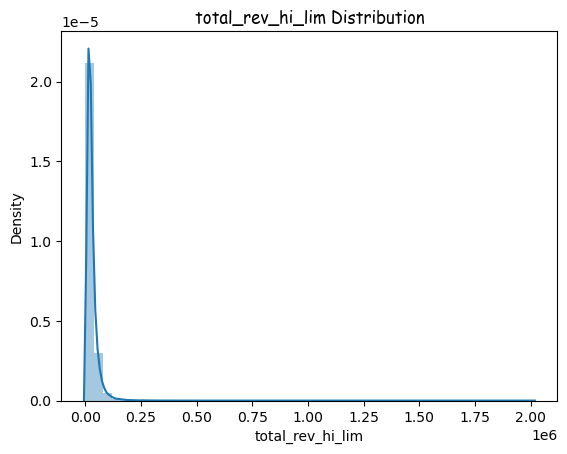

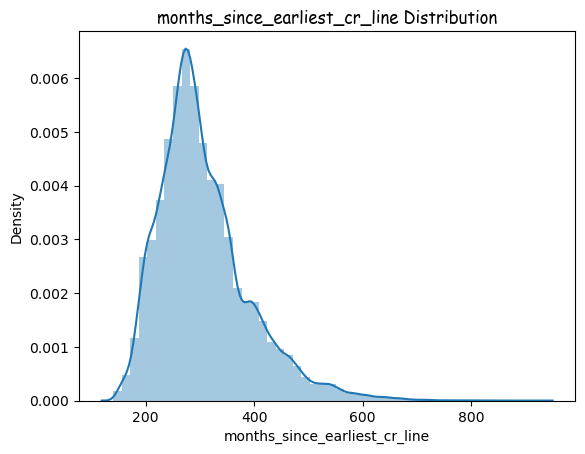

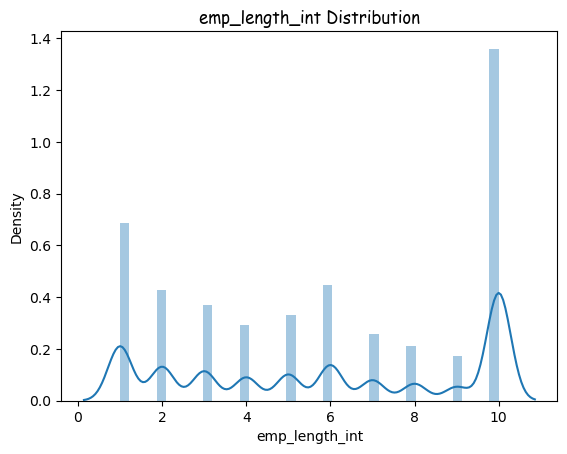

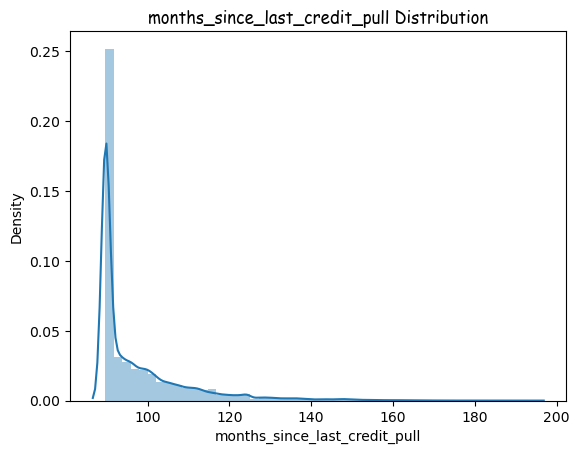

In [76]:
#lets visualise distributions of numerical columns
for i in numerical.columns[1:]:
    sns.distplot(df[i])
    plt.title(f'{i} Distribution',fontfamily='cursive')
    plt.show()

These are distibutions of our continuous variables

<function matplotlib.pyplot.show(close=None, block=None)>

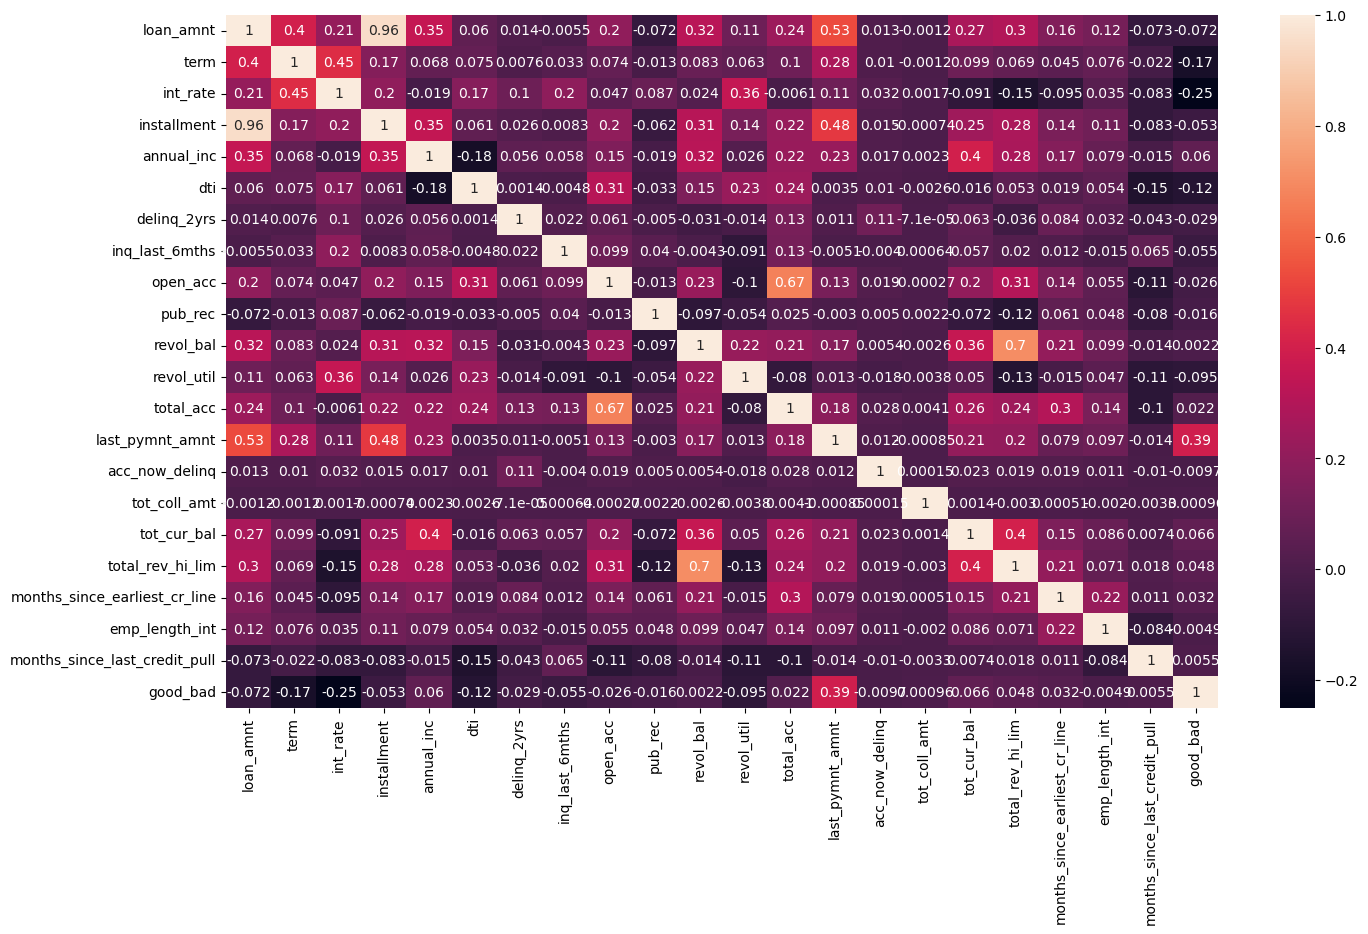

In [77]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)
plt.show

As we can see there is high correlation between few independent correlation.
we will drop those features with less importance which is highly correlated with any other feature

In [78]:
df.drop(['installment','total_acc','total_rev_hi_lim'],axis=1,inplace=True)

#  Outliers

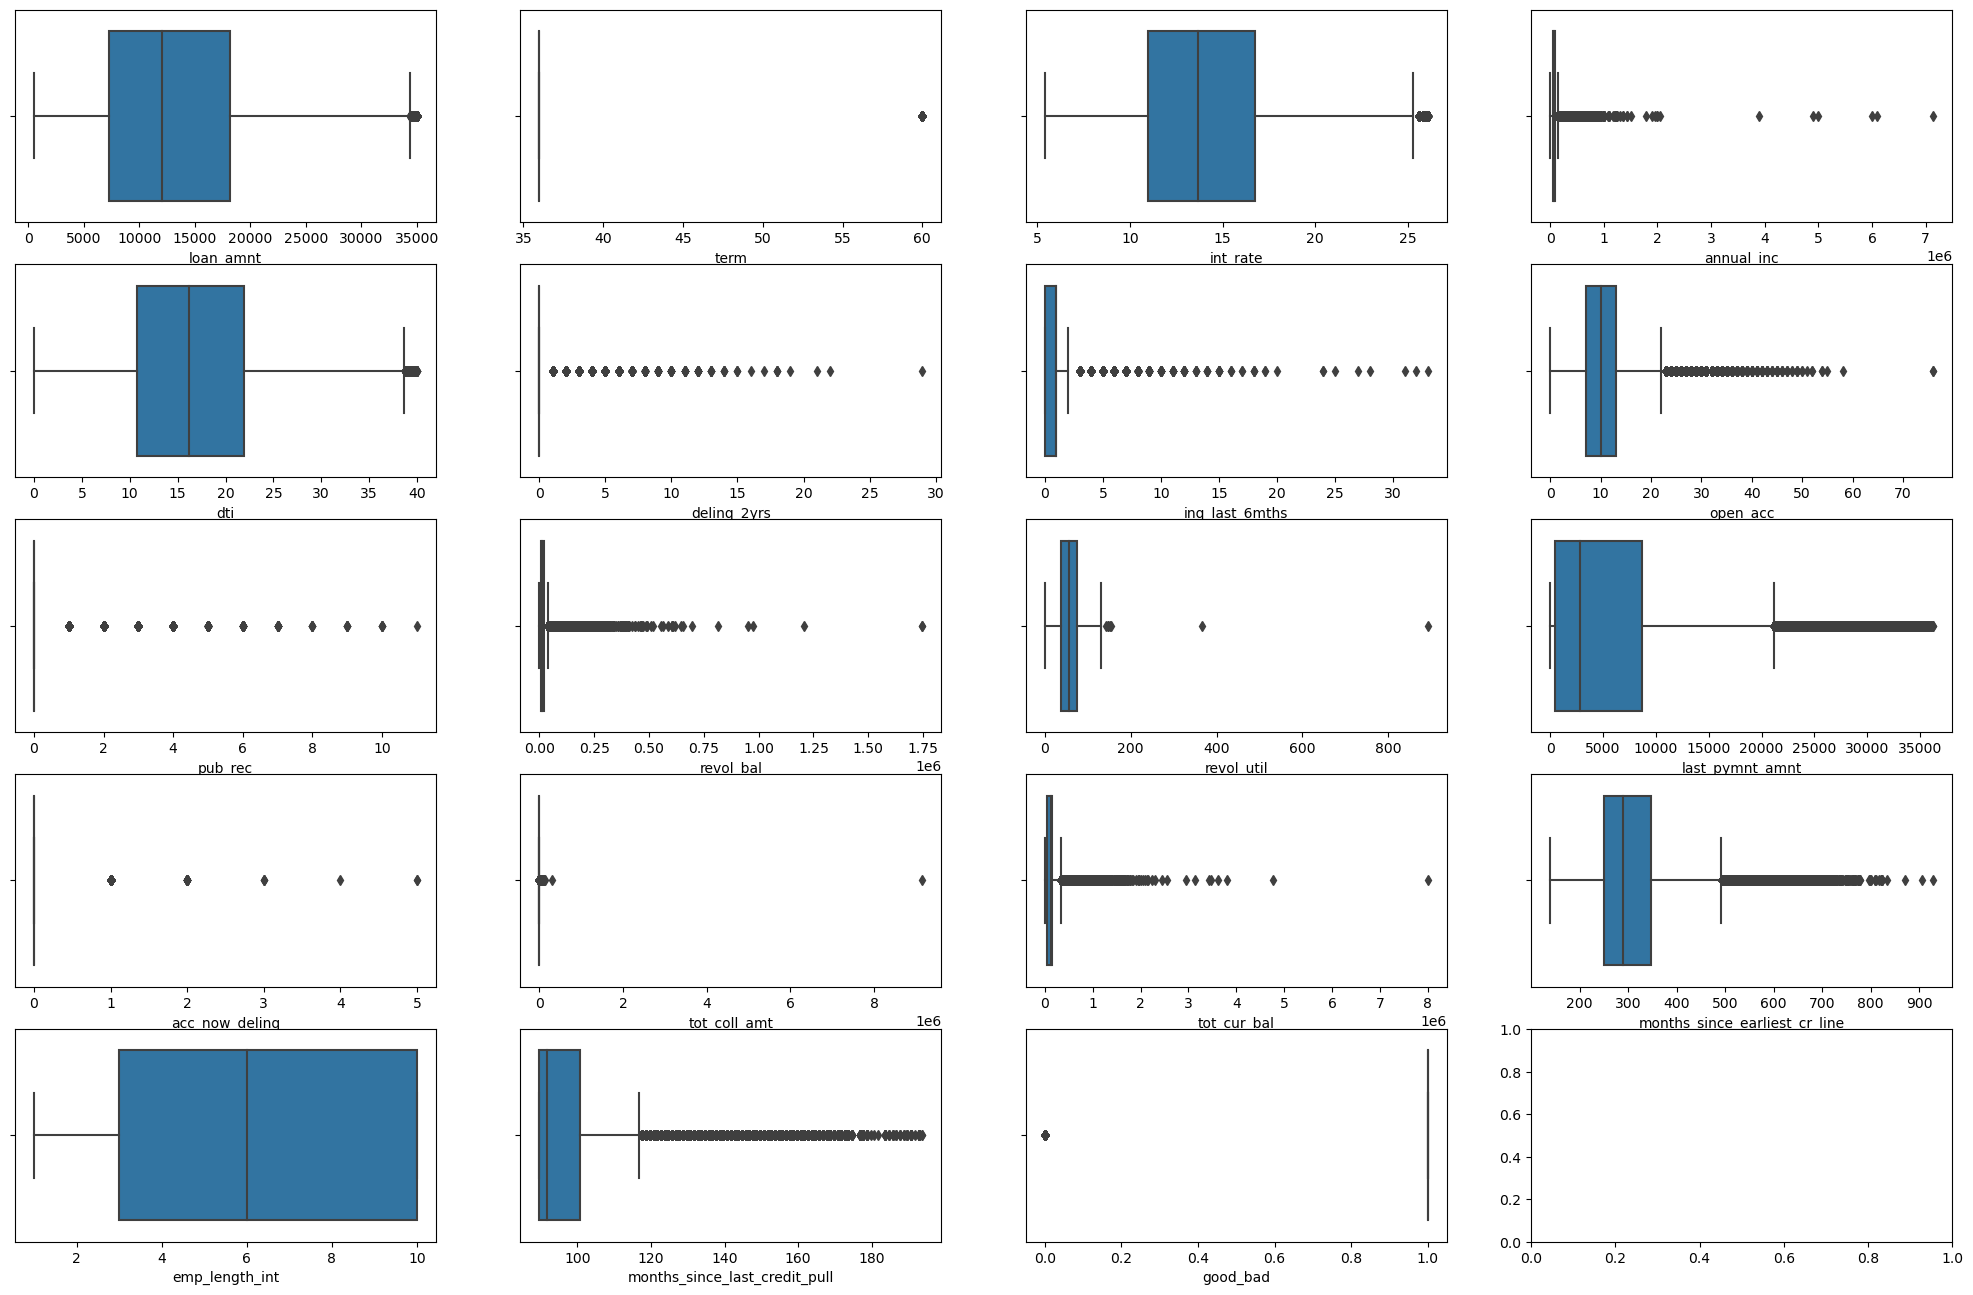

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

In [79]:
numerical=df.select_dtypes(['int','float'])
fig,axes=plt.subplots(5,4,figsize=(25,16))
axes=axes.ravel()
for i,ax in zip(numerical.columns,axes):
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i],ax=ax)
    plt.tight_layout()

As we can see boxplot showing us outliers in many columns,but we cant simply drop them as it is common to have very high values in columns such as annual_inc,revol_bal and so on
we can treat outliers by grouping the data into various bins and then using woe score in place of raw score

#  Data Preparation

### Binning:
In this section we will make bins of  our continuos features in order to enhance predictive power of features

`Note:we are binning our data so that we can calculate woe(weight of evidence) later`



In [80]:
pd.cut(df.loan_amnt,bins=np.linspace(df.loan_amnt.min(),df.loan_amnt.max(),10))

0           (4333.333, 8166.667]
1              (500.0, 4333.333]
2              (500.0, 4333.333]
3            (8166.667, 12000.0]
4           (4333.333, 8166.667]
                   ...          
242054       (8166.667, 12000.0]
242055    (15833.333, 19666.667]
242056       (8166.667, 12000.0]
242057      (19666.667, 23500.0]
242058         (500.0, 4333.333]
Name: loan_amnt, Length: 242008, dtype: category
Categories (9, interval[float64, right]): [(500.0, 4333.333] < (4333.333, 8166.667] < (8166.667, 12000.0] < (12000.0, 15833.333] ... (19666.667, 23500.0] < (23500.0, 27333.333] < (27333.333, 31166.667] < (31166.667, 35000.0]]

In [81]:
#builting a function to do binning
def f(column):
    bin=list(set(np.percentile(column,q=[0,10,20,30,50,70,90,95,100])))
    bin.sort()
    return pd.cut(column,bins=bin,include_lowest=True)

In [82]:
df1=df.copy()
df1['loan_amnt']=f(df1.loan_amnt)
df1['int_rate']=f(df1.int_rate)
df1['annual_inc']=f(df1.annual_inc)
df1['dti']=f(df1.dti)
df1['revol_bal']=f(df1.revol_bal)
df1['months_since_earliest_cr_line']=f(df1.months_since_earliest_cr_line)
df1['months_since_last_credit_pull']=f(df1.months_since_last_credit_pull)
df1['tot_cur_bal']=f(df1.tot_cur_bal)
df1['revol_util']=f(df1.revol_util)
df1['tot_coll_amt']=f(df1.tot_coll_amt)
df1['delinq_2yrs']=f(df1.delinq_2yrs)
df1['inq_last_6mths']=f(df1.inq_last_6mths)
df1['open_acc']=f(df1.open_acc)
df1['pub_rec']=f(df1.pub_rec)
df1['acc_now_delinq']=f(df1.acc_now_delinq)
df1['emp_length_int']=f(df1.emp_length_int)
df1['last_pymnt_amnt']=f(df1.last_pymnt_amnt)



In [83]:
for i in df1.columns:
    print(df1[i].value_counts())

(8000.0, 12000.0]     58452
(16400.0, 25000.0]    51088
(12000.0, 16400.0]    37804
(6250.0, 8000.0]      24473
(4725.0, 6250.0]      24458
(499.999, 4725.0]     24226
(25000.0, 30000.0]    11215
(30000.0, 35000.0]    10292
Name: loan_amnt, dtype: int64
36    188401
60     53607
Name: term, dtype: int64
(15.81, 19.72]    49574
(11.49, 13.67]    49180
(13.67, 15.81]    47661
(5.419, 7.9]      29007
(9.99, 11.49]     24276
(7.9, 9.99]       19458
(21.98, 26.06]    11594
(19.72, 21.98]    11258
Name: int_rate, dtype: int64
B    72902
C    61932
A    39660
D    39425
E    18524
F     7532
G     2033
Name: grade, dtype: int64
B3    17523
B4    16278
C1    14158
B2    14061
B5    13559
C2    13537
C3    12124
B1    11481
C4    11429
A5    11165
C5    10684
A4    10425
D1     9671
D2     8877
D3     7774
D4     7174
A3     6772
D5     5929
A2     5789
A1     5509
E1     4475
E2     4446
E3     3637
E4     3218
E5     2748
F1     2163
F2     1722
F3     1549
F4     1167
F5      931
G1      681

we can see each bins contains good number of observation but acc_now_delinq columns is wrongly binned

In [84]:
df1['acc_now_delinq']=df['acc_now_delinq']
df1['acc_now_delinq'].value_counts()

0.0    241352
1.0       621
2.0        29
3.0         3
5.0         2
4.0         1
Name: acc_now_delinq, dtype: int64

In [85]:
df1['acc_now_delinq']=pd.cut(df1.acc_now_delinq,bins=[0,0.99,5],include_lowest=True)
df1['acc_now_delinq'].value_counts()

(-0.001, 0.99]    241352
(0.99, 5.0]          656
Name: acc_now_delinq, dtype: int64

#  *weight of Evidence*


**The Weight of Evidence (WOE) tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers.**

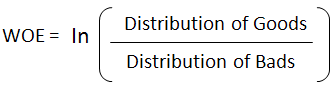

**`Distribution of Goods`** - % of Good Customers in a particular group

**`Distribution of Bads`**- % of Bad Customers in a particular group

**`ln`** - Natural log

# *Information Value*(IV)


**Information Value analysis is a data exploration technique that helps determine which columns in a data set have predictive power or influence on the value of a specified dependent variable**




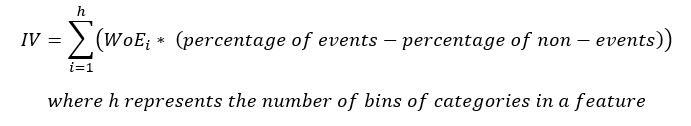

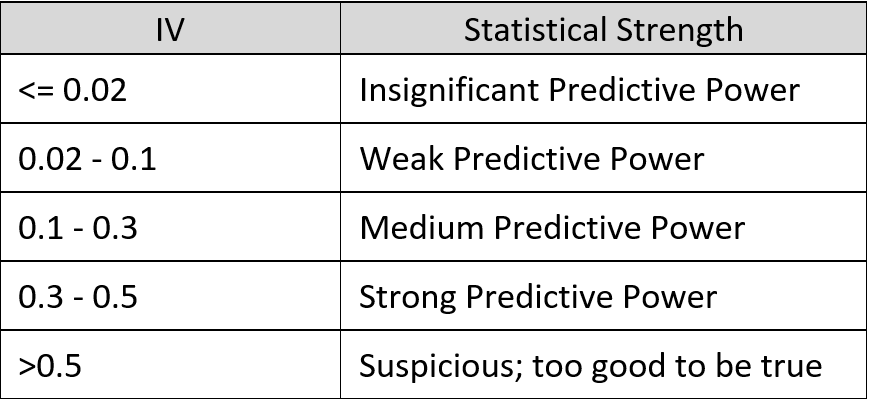

*we will now make a standard function to calculate woe and IV*

In [86]:

def woe(data,feature):
    
    
    count=data[[feature,'good_bad']].groupby(feature,as_index=False).count()
    good_prop=data[[feature,'good_bad']].groupby(feature,as_index=False).mean().replace(np.nan,0)
    woe_data=pd.merge(count,good_prop,on=feature)
    woe_data.columns=['feature','count','good_prop']
    woe_data['good_obs']=(woe_data['count']*woe_data['good_prop'])+0.5    # This is known as adjusted woe if any 
    woe_data['bad_obs']=(woe_data['count']*(1-woe_data['good_prop']))+0.5 #  if any caetgory contains zero good or
    woe_data['prop_n_good']=woe_data['good_obs']/woe_data['good_obs'].sum()#  bad events
    woe_data['prop_n_bad']=woe_data['bad_obs']/woe_data['bad_obs'].sum()
    woe_data['woe']=np.log(woe_data['prop_n_good']/woe_data['prop_n_bad'])
    woe_data['iv']= (woe_data['prop_n_good']-woe_data['prop_n_bad'])*woe_data['woe']
    dic=dict(zip(woe_data['feature'],woe_data['woe']))

    return dic,woe_data

    
    
    

checking woe and iv of loan amount 

In [87]:
woe(df1,'loan_amnt')[1]

,feature,count,good_prop,good_obs,bad_obs,prop_n_good,prop_n_bad,woe,iv
0,"(499.999, 4725.0]",24226,0.821184,19894.5,4332.5,0.104799,0.083028,0.232862,0.005070
1,"(4725.0, 6250.0]",24458,0.818137,20010.5,4448.5,0.105410,0.085251,0.212253,0.004279
2,"(6250.0, 8000.0]",24473,0.816165,19974.5,4499.5,0.105220,0.086229,0.199053,0.003780
3,"(8000.0, 12000.0]",58452,0.795165,46479.5,11973.5,0.244842,0.229461,0.064879,0.000998
4,"(12000.0, 16400.0]",37804,0.778410,29427.5,8377.5,0.155016,0.160547,-0.035057,0.000194
5,"(16400.0, 25000.0]",51088,0.755481,38596.5,12492.5,0.203316,0.239407,-0.163404,0.005897
6,"(25000.0, 30000.0]",11215,0.717610,8048.5,3167.5,0.042397,0.060702,-0.358894,0.006569
7,"(30000.0, 35000.0]",10292,0.719297,7403.5,2889.5,0.039000,0.055375,-0.350567,0.005741


**` Now we will check information value of all the columns with iv less than 0.01`**

In [88]:
[i for i in df.drop('good_bad',axis=1).columns if woe(df1,i)[1]['iv'].sum()<0.01]

['delinq_2yrs',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'initial_list_status',
 'acc_now_delinq',
 'tot_coll_amt',
 'emp_length_int']

In [89]:
df1.drop(['open_acc','pub_rec','initial_list_status','tot_coll_amt'],axis=1,inplace=True)

In [90]:
df1.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,revol_bal,revol_util,last_pymnt_amnt,acc_now_delinq,tot_cur_bal,months_since_earliest_cr_line,emp_length_int,months_since_last_credit_pull,good_bad
0,"(4725.0, 6250.0]",36,"(9.99, 11.49]",B,B2,RENT,"(1895.999, 33000.0]",Verified,credit_card,AZ,"(26.97, 29.73]","(-0.001, 1.0]","(-0.001, 1.0]","(10997.0, 16952.0]","(70.8, 87.1]","(-0.001, 194.987]","(-0.001, 0.99]","(51642.4, 136452.236]","(417.684, 465.685]","(9.0, 10.0]","(89.693, 91.698]",1
1,"(499.999, 4725.0]",60,"(13.67, 15.81]",C,C4,RENT,"(1895.999, 33000.0]",Source Verified,car,GA,"(-0.001, 6.41]","(-0.001, 1.0]","(3.0, 33.0]","(-0.001, 2942.0]","(-0.001, 20.2]","(-0.001, 194.987]","(-0.001, 0.99]","(51642.4, 136452.236]","(289.747, 332.721]","(0.999, 2.0]","(112.659, 123.731]",0
2,"(499.999, 4725.0]",36,"(15.81, 19.72]",C,C5,RENT,"(1895.999, 33000.0]",Not Verified,small_business,IL,"(6.41, 9.47]","(-0.001, 1.0]","(1.0, 2.0]","(2942.0, 4996.0]","(92.5, 892.3]","(519.252, 2788.66]","(-0.001, 0.99]","(51642.4, 136452.236]","(238.724, 259.685]","(9.0, 10.0]","(89.693, 91.698]",1
3,"(8000.0, 12000.0]",36,"(11.49, 13.67]",C,C1,RENT,"(48000.0, 61500.0]",Source Verified,other,CA,"(16.18, 20.66]","(-0.001, 1.0]","(-0.001, 1.0]","(4996.0, 6853.1]","(20.2, 32.6]","(339.59, 519.252]","(-0.001, 0.99]","(51642.4, 136452.236]","(289.747, 332.721]","(9.0, 10.0]","(98.729, 112.659]",1
4,"(4725.0, 6250.0]",36,"(5.419, 7.9]",A,A4,RENT,"(33000.0, 40344.0]",Source Verified,wedding,AZ,"(9.47, 11.9]","(-0.001, 1.0]","(2.0, 3.0]","(6853.1, 10997.0]","(20.2, 32.6]","(-0.001, 194.987]","(-0.001, 0.99]","(51642.4, 136452.236]","(212.703, 238.724]","(2.0, 3.0]","(91.698, 98.729]",1


# **Model Evaluation**

splitting the data into independent feature and target variable

In [91]:
x=df1.drop('good_bad',axis=1)
y=df1['good_bad']

 **`Woe Transformation`**
 
we will convert the bins with their respective woe values in next step as it is helpfull in creating a linear relationship between features and target



In [92]:
for column in x.columns:
    x[column]=x[column].map(woe(df1,column)[0])

In [93]:
x.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,revol_bal,revol_util,last_pymnt_amnt,acc_now_delinq,tot_cur_bal,months_since_earliest_cr_line,emp_length_int,months_since_last_credit_pull
0,0.212253,0.237139,0.559998,0.435748,0.580820,-0.119116,-0.312605,-0.155964,0.154619,0.023011,-0.467057,0.013925,0.061562,-0.062232,-0.185461,-0.817772,0.001222,0.129902,0.116057,0.021465,-0.138616
1,0.232862,-0.659516,-0.106230,-0.127897,-0.261000,-0.119116,-0.312605,-0.115639,0.536787,0.048667,0.458144,0.013925,-0.340383,0.170636,0.597737,-0.817772,0.001222,0.129902,0.038423,0.029455,-0.209455
2,0.232862,0.237139,-0.490870,-0.127897,-0.319559,-0.119116,-0.312605,0.297376,-0.533578,0.094519,0.354145,0.013925,-0.128870,0.059717,-0.353064,-0.596197,0.001222,0.129902,-0.055325,0.021465,-0.138616
3,0.064879,0.237139,0.230580,-0.127897,0.081548,-0.119116,-0.085614,-0.115639,-0.146610,0.082123,-0.038069,0.013925,0.061562,0.001702,0.291391,-1.602165,0.001222,0.129902,0.038423,0.021465,-0.080999
4,0.212253,0.237139,1.387855,1.228181,1.124779,-0.119116,-0.246606,-0.115639,0.513414,0.023011,0.246480,0.013925,-0.234082,-0.021023,0.291391,-0.817772,0.001222,0.129902,-0.060323,0.041170,0.618628


Splitting the data into training and testing

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)

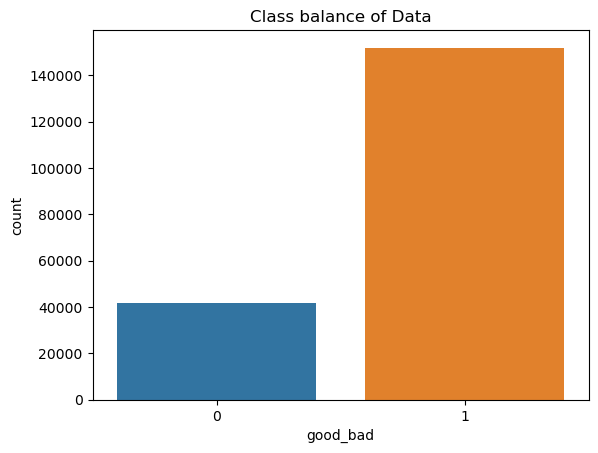

In [95]:
plt.title("Class balance of Data")
sns.countplot(y_train)
plt.show()

As we can see our target class is unbalance so we will balance the target class by resampling with the help  of RandomOverSampler

(303936, 21)
(303936,)


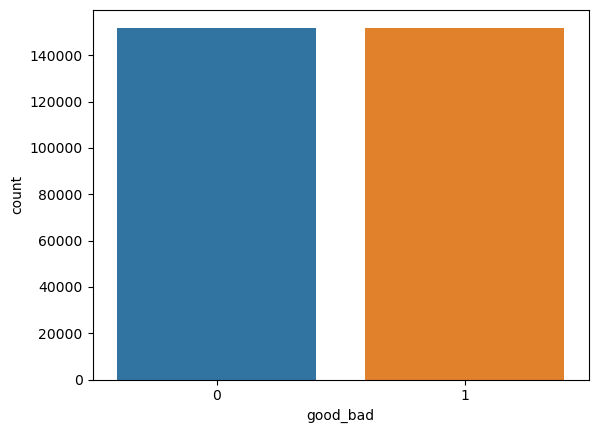

In [96]:
from imblearn.over_sampling import RandomOverSampler

os=RandomOverSampler()
x_train_o,y_train_o=os.fit_resample(x_train,y_train)

print(x_train_o.shape)
print(y_train_o.shape)

sns.countplot(y_train_o)
plt.show()

## **`Logistic Regression`**

In [97]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_o,y_train_o)

print("Training Score :",lr.score(x_train_o,y_train_o))
print("Test score: ",lr.score(x_test,y_test))

Training Score : 0.8576246315013687
Test score:  0.8214123383331268


In [98]:
#checking more metrics
from sklearn import metrics
y_pred_lr=lr.predict(x_test)
print(metrics.classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.55      0.92      0.69     10539
           1       0.97      0.79      0.87     37863

    accuracy                           0.82     48402
   macro avg       0.76      0.86      0.78     48402
weighted avg       0.88      0.82      0.83     48402



**Confusion Matrix**

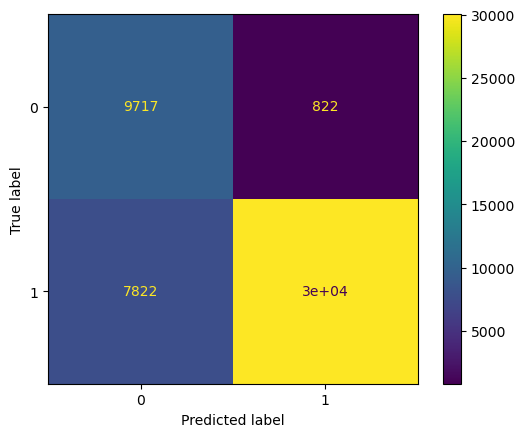

In [99]:
metrics.plot_confusion_matrix(lr,x_test,y_test)
plt.show()

we will try few more algorithm 

## **`Decision Tree`**

In [100]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train_o,y_train_o)
print("Training score",dt.score(x_train,y_train))
print("Test score",dt.score(x_test,y_test))

Training score 0.9999948348708201
Test score 0.8594892773025908


This model is overfitted as we haven't mentioned any  hypermparameter such as max_depth 
we will do hyperparameter tunning by help of GridSearchCV

In [101]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier(random_state=90)

param={'max_depth':np.arange(2,20,4)}

search=GridSearchCV(estimator=dt,param_grid=param,cv=5,return_train_score=True)

search.fit(x_train_o,y_train_o)

score=pd.DataFrame(search.cv_results_)
score


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.562874,0.009385,0.028050,0.006213,2,{'max_depth': 2},0.817727,0.815849,0.817247,0.816375,0.816704,0.816781,0.000656,5,0.816544,0.817013,0.816664,0.816882,0.816800,0.816781,0.000164
1,1.256856,0.116826,0.031287,0.000041,6,{'max_depth': 6},0.876785,0.877161,0.876914,0.875533,0.875220,0.876323,0.000788,4,0.876943,0.876615,0.876676,0.877018,0.874817,0.876414,0.000813
2,2.038770,0.074422,0.033190,0.003911,10,{'max_depth': 10},0.887478,0.888381,0.888825,0.888841,0.886489,0.888003,0.000904,3,0.891478,0.891852,0.891059,0.891996,0.890039,0.891285,0.000703
3,2.723870,0.219553,0.046649,0.008350,14,{'max_depth': 14},0.901033,0.899962,0.904387,0.902002,0.903910,0.902259,0.001679,2,0.914603,0.913921,0.913440,0.914077,0.914855,0.914179,0.000502
4,3.036221,0.090038,0.044598,0.004531,18,{'max_depth': 18},0.917879,0.917301,0.922187,0.922549,0.924375,0.920858,0.002776,1,0.947320,0.947954,0.945782,0.945815,0.948945,0.947163,0.001229


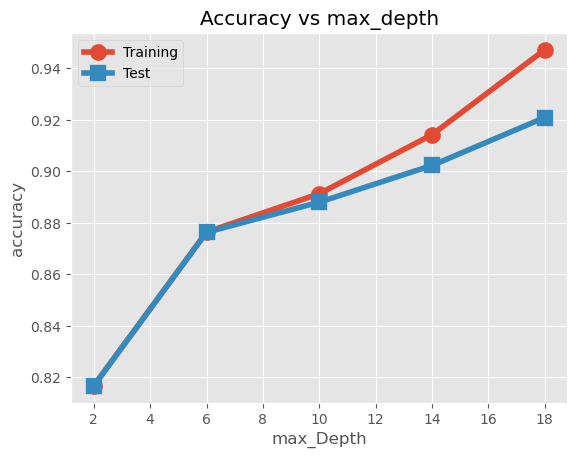

In [102]:
from matplotlib import style
style.use('ggplot')
plt.plot(np.arange(2,20,4),score['mean_train_score'],label="Training",marker='o',linewidth=4,markeredgewidth=6)
plt.plot(np.arange(2,20,4),score['mean_test_score'],label="Test",marker='s',linewidth=4,markeredgewidth=6)
plt.xlabel('max_Depth')
plt.ylabel("accuracy")
plt.title("Accuracy vs max_depth")
plt.legend()
plt.show()

 we can see after 10 training plot increaing more rapidly that is it will overfit

In [103]:
#getting gridsearch for more hyperparameter
dt=DecisionTreeClassifier(random_state=90)

param={
       'min_samples_split':[100,200,300],
      }

search=GridSearchCV(estimator=dt,param_grid=param,cv=5,return_train_score=True)

search.fit(x_train_o,y_train_o)

score=pd.DataFrame(search.cv_results_)
score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.125870,0.225249,0.046976,0.009879,100,{'min_samples_split': 100},0.894502,0.896146,0.901229,0.899551,0.899337,0.898153,0.002457,1,0.911873,0.911597,0.911079,0.910981,0.911083,0.911323,0.000350
1,3.065479,0.041330,0.045968,0.001796,200,{'min_samples_split': 200},0.892002,0.894583,0.896030,0.893974,0.893958,0.894109,0.001296,2,0.901801,0.901632,0.900691,0.900978,0.901583,0.901337,0.000426
2,2.983430,0.091109,0.045423,0.002892,300,{'min_samples_split': 300},0.890867,0.891868,0.893941,0.890289,0.892181,0.891829,0.001256,3,0.897856,0.897248,0.896660,0.896175,0.897014,0.896991,0.000564


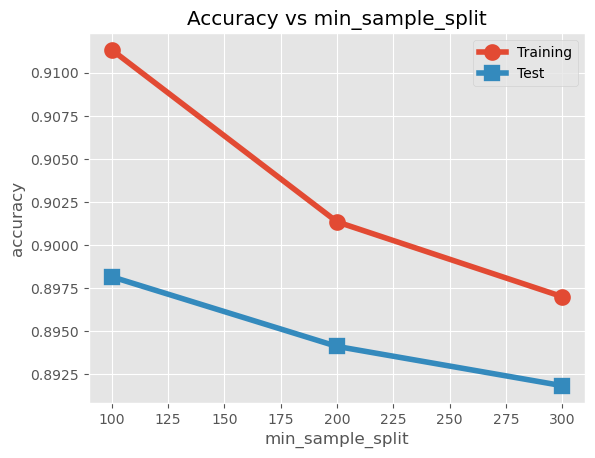

In [104]:
plt.plot([100,200,300],score['mean_train_score'],label="Training",marker='o',linewidth=4,markeredgewidth=6)
plt.plot([100,200,300],score['mean_test_score'],label="Test",marker='s',linewidth=4,markeredgewidth=6)
plt.xlabel('min_sample_split')
plt.ylabel("accuracy")
plt.title("Accuracy vs min_sample_split")
plt.legend()
plt.show()

Creating final decision Tree model with tuned parameters

In [105]:
dt_final=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=300)
dt_final.fit(x_train_o,y_train_o)
print("Training score",dt_final.score(x_train_o,y_train_o))
print("Testing Score",dt_final.score(x_test,y_test))

Training score 0.889598468098547
Testing Score 0.8503574232469733


In [106]:
y_pred_dt=dt_final.predict(x_test)
print(metrics.classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.60      0.95      0.73     10539
           1       0.98      0.82      0.90     37863

    accuracy                           0.85     48402
   macro avg       0.79      0.89      0.81     48402
weighted avg       0.90      0.85      0.86     48402



## **`Naive Bayes`**

In [107]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train_o,y_train_o)
print("training score",bnb.score(x_train_o,y_train_o))
print('test score',bnb.score(x_test,y_test))

training score 0.7956971204464097
test score 0.8261228874839882


In [108]:
y_pred_nb=bnb.predict(x_test)
print(metrics.classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.58      0.74      0.65     10539
           1       0.92      0.85      0.88     37863

    accuracy                           0.83     48402
   macro avg       0.75      0.79      0.77     48402
weighted avg       0.85      0.83      0.83     48402



# Conclusion

We cleander our data and only kept important feature then we applied machine learning to predict whether any borrower will default or not.After training and validating three different models which is Logistic Regression,Decison Tree,Naive bayes
we found our Logistic Regression Model and Decison Tree Model works well but due to efficiency we are selecting our LogisticRegression Model as Final model.